INFO:cmdstanpy:compiling stan file C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\lab3\stan1.stan to exe file C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\lab3\stan1.exe
INFO:cmdstanpy:compiled model executable: C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\lab3\stan1.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


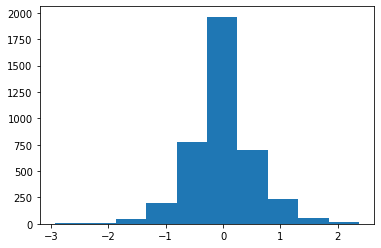

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


normal = pd.read_csv('https://raw.githubusercontent.com/KAIR-ISZ/public_lectures/master/Data%20Analytics%202022/Lab%203%20-%20Probability%20distribution/normal.csv', index_col=0, header=0)
divergence = CmdStanModel(stan_file='stan1.stan')
divergence_sample = divergence.sample(data={'N':1, 'y':[normal['value'][0]]})
plt.hist(divergence_sample.stan_variable('mu'))
plt.show()


In [2]:
coin = pd.read_csv('https://raw.githubusercontent.com/KAIR-ISZ/public_lectures/master/Data%20Analytics%202022/Lab%203%20-%20Probability%20distribution/coin.csv')
model = CmdStanModel(stan_file='stan2.stan')
result = model.sample(data={"N" : len(coin['Toss_Result']), "y" : coin['Toss_Result'].to_list()}, 
                            seed = 9012022,
                            chains = 4)
result.summary()


INFO:cmdstanpy:compiling stan file C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\lab3\stan2.stan to exe file C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\lab3\stan2.exe
INFO:cmdstanpy:compiled model executable: C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\lab3\stan2.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/macie/OneDrive/Pulpit/All/Studia/AIR_2022/Data_analytics/Data_Analytics/lab3/stan2.hpp C:/Users/macie/OneDrive/Pulpit/All/Studia/AIR_2022/Data_analytics/Data_Analytics/lab3/stan2.stan
Warning in 'C:/Users/macie/OneDrive/Pulpit/All/Studia/AIR_2022/Data_analytics/Data_Analytics/lab3/stan2.stan', line 3, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
 


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01800,0.720,-290.00,-290.00,-290.0,1600.0,25000.0,1.0
theta,0.46,0.00066,0.025,0.42,0.46,0.5,1400.0,22000.0,1.0


array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

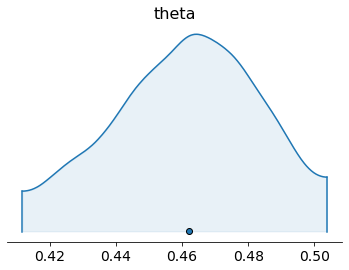

In [3]:
arviz_result = az.from_cmdstanpy(
    posterior=result,
)
arviz_result

az.plot_density(arviz_result,shade=0.1)


In [4]:
model = CmdStanModel(stan_file='stan3.stan')
result = model.sample(data={'N': 1, 'y':[normal['value'][0]]}, 
                            seed = 9012022,
                            chains = 4)
result.summary()


INFO:cmdstanpy:compiling stan file C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\lab3\stan3.stan to exe file C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\lab3\stan3.exe
INFO:cmdstanpy:compiled model executable: C:\Users\macie\OneDrive\Pulpit\All\Studia\AIR_2022\Data_analytics\Data_Analytics\lab3\stan3.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-0.860,0.030,0.92,-2.80,-0.560,-0.044,940.0,11000.0,1.0
mu,-0.020,0.017,0.55,-0.95,-0.029,0.940,1000.0,13000.0,1.0
sigma,0.680,0.019,0.51,0.10,0.560,1.700,690.0,8300.0,1.0
y_rep[1],-0.019,0.019,0.96,-1.50,-0.024,1.600,2544.0,30649.0,1.0


In [5]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

NameError: name 'y' is not defined